In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
import seaborn as sb
from platform import python_version

from sklearn.metrics import mean_squared_error as mse

print(python_version())
print(np.version.version)
print(pd.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(sb.__version__)

3.7.15
1.21.6
1.3.5
3.2.2
1.0.2
0.11.2


**Reading the original dataframe provided by NIST for superheated R134a**

In [3]:
o_df=pd.read_excel('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled.xlsx',index_col=None)
o_df

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K),Phase
0,-36.935,60,1408.8,0.000710,151.96,152.00,0.81202,0.83613,1.2600,792.76,-0.28729,0.000445,0.109100,liquid
1,-40.000,60,1417.7,0.000705,148.11,148.15,0.79560,0.83284,1.2546,807.26,-0.29416,0.000467,0.110600,liquid
2,-26.361,100,1377.5,0.000726,165.37,165.44,0.86756,0.84784,1.2800,743.31,-0.26099,0.000380,0.104040,liquid
3,-30.000,100,1388.4,0.000720,160.73,160.80,0.84860,0.84375,1.2728,760.36,-0.27062,0.000401,0.105770,liquid
4,-40.000,100,1417.8,0.000705,148.09,148.16,0.79554,0.83285,1.2545,807.49,-0.29428,0.000467,0.110610,liquid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000,4000,1308.6,0.000764,197.86,200.91,0.99291,0.87860,1.3227,651.76,-0.19893,0.000280,0.094232,liquid
256,-10.000,4000,1339.5,0.000747,184.81,187.80,0.94400,0.86680,1.3008,695.62,-0.23238,0.000318,0.098584,liquid
257,-20.000,4000,1369.3,0.000730,171.97,174.89,0.89400,0.85535,1.2810,739.77,-0.26052,0.000364,0.103040,liquid
258,-30.000,4000,1398.3,0.000715,159.31,162.17,0.84274,0.84425,1.2630,784.39,-0.28450,0.000419,0.107620,liquid


In [4]:
o_df.describe()

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,10.104321,1930.653846,1247.732923,0.000817,215.122385,216.770654,1.042884,0.898186,1.567462,584.956373,0.100007,0.000269,0.088861
std,37.908690,1247.687883,155.291347,0.000129,53.953031,54.756907,0.184874,0.059527,1.658017,177.425910,0.932472,0.000119,0.016421
min,-40.000000,60.000000,632.860000,0.000701,146.820000,148.150000,0.790050,0.832840,1.246500,97.697000,-0.305160,0.000046,0.051600
25%,-20.000000,800.000000,1165.075000,0.000733,172.735000,173.772500,0.897080,0.855120,1.286725,465.592500,-0.252045,0.000171,0.076769
50%,0.000000,1800.000000,1295.400000,0.000772,199.690000,200.815000,0.999690,0.879060,1.340150,622.995000,-0.170860,0.000267,0.092111
75%,40.000000,3000.000000,1363.875000,0.000858,253.147500,256.085000,1.182800,0.930662,1.460050,727.020000,0.055877,0.000356,0.102070
max,100.340000,4000.000000,1426.600000,0.001580,369.250000,375.570000,1.524700,1.185500,26.328000,829.610000,8.811500,0.000487,0.112350


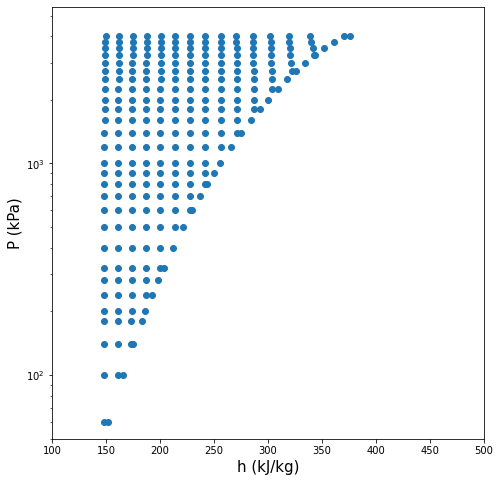

In [5]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([100, 500]);
ax.scatter(x=o_df['h (kJ/kg)'].values,y=o_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

#Augmenting the data first for pressure
As you know the superheated data consists of a set of small tables  with constant pressure with a little bit far apart, so the augmentation done here is to generate some new small tables for new different constant pressure values for each table. The temperatures for new tables ranges from the lower limit saturation T which will be calculated by interpolation and the upper limit is the max T in the previous sub table, Why? beside it's the criterion ready made tables from NIST, it's the most safe we because if we take the max of the next sub table we maybe exceed the natural upper limit temperature of the refrigerant R134a at that new point we which interplote.


**Finally:** the resulting table is the same to the original data with a new sub tables.

In [6]:
o_df.columns

Index(['T ©', 'P (kPa)', 'Density (kg/m^3)', 'v (m^3/kg)', 'u (kJ/kg)',
       'h (kJ/kg)', 's (kJ/kg.K)', 'Cv (kJ/kg.K)', 'Cp (kJ/kg.K)',
       'Sound Spd. (m/s)', 'Joule-Thomson (K/MPa)', 'Viscosity (Pa.s)',
       'Therm. Cond. (W/m.K)', 'Phase'],
      dtype='object')

In [7]:
step=1
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}



#The o_df is the original data but in a form of tidy data, so all sub tables 
#exist here but on top of each other. Hence the fisrt iteration is over it by 
#pressure to take one subtable at a time
for i,P1 in enumerate(o_df['P (kPa)'].unique()):
  if (P1 ==o_df['P (kPa)'].unique().max()): break 
  #Break when reaching the end of the o_df because there is no sub tables else

  else:
    P2=o_df['P (kPa)'].unique()[i+1] #Here we take the next sub table to interpolate with

    #Reset index is important because it will be used to handle it, while when 
    #copying it the index was the old one for that portion
    df1=o_df[o_df['P (kPa)']==P1]
    df2=o_df[o_df['P (kPa)']==P2]
    print("=============================================")
    print("main table P1= {} and P2= {}".format(P1,P2)) #Indecation


    #Now the iteration for an intermediate values of pressure 
    #between the two values of the two sub tables
    #The step here is approximatly by 500 Pascal
    for P in np.linspace(P1,P2,num=int(((P2-P1)/step))):
    
      #The sturation temp for the sub tables table
      T1_sat=df1['T ©'].values.max()
      T2_sat=df2['T ©'].values.max()
      
      #The sturation temp for the new sub table table will be generated
      T_sat= (T2_sat-((P2-P)/(P2-P1)*(T2_sat-T1_sat)))
      #The max temp interpreted above in the written text
      print("For P {} the sat {}".format(P,T_sat))

      for i,T in enumerate(df2['T ©'].values):
        if (i==0): continue
        #elif (T<T_min): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)
        elif(T not in (df1['T ©'].values) ): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)

      for i,T in enumerate(df1['T ©'].values):
        if(i==0): continue
        #elif(T<T_sat): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)
        elif((T not in (df2['T ©'].values)) ): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)

      #print(len(df1)==len(df2))

      T_col=np.array(df1['T ©'].values)
      T_col[0]=T_sat

      P_col=np.array(df1['T ©'].values)
      P_col.fill(P)

      v_col=(((np.array(df2['v (m^3/kg)'])-np.array(df1['v (m^3/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['v (m^3/kg)'])
      u_col=(((np.array(df2['u (kJ/kg)'])-np.array(df1['u (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['u (kJ/kg)'])
      h_col=(((np.array(df2['h (kJ/kg)'])-np.array(df1['h (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['h (kJ/kg)'])
      s_col=(((np.array(df2['s (kJ/kg.K)'])-np.array(df1['s (kJ/kg.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['s (kJ/kg.K)'])
      speed_col=(((np.array(df2['Sound Spd. (m/s)'])-np.array(df1['Sound Spd. (m/s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Sound Spd. (m/s)'])
      visc_col=(((np.array(df2['Viscosity (Pa.s)'])-np.array(df1['Viscosity (Pa.s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Viscosity (Pa.s)'])
      cond_col=(((np.array(df2['Therm. Cond. (W/m.K)'])-np.array(df1['Therm. Cond. (W/m.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Therm. Cond. (W/m.K)'])

      generated['T ©'].extend(T_col)
      generated['P (kPa)'].extend(P_col)
      generated['v (m^3/kg)'].extend(v_col)
      generated['u (kJ/kg)'].extend(u_col)
      generated['h (kJ/kg)'].extend(h_col)
      generated['s (kJ/kg.K)'].extend(s_col)
      generated['Sound Spd. (m/s)'].extend(speed_col)
      generated['Viscosity (Pa.s)'].extend(visc_col)
      generated['Therm. Cond. (W/m.K)'].extend(cond_col)
      print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],v_col[0],u_col[0],h_col[0],s_col[0]))
      #display(pd.DataFrame(columns))

df_part1=pd.DataFrame(generated)
generated=0
df_part1


main table P1= 60 and P2= 100
For P 60.0 the sat -36.935
Appended P 60.0 ,T -36.935, v 0.00070982, u 151.96, h 152.0, s0.81202
For P 61.02564102564102 the sat -36.663871794871795
Appended P 61.02564102564102 ,T -36.663871794871795, v 0.000710233076923077, u 152.30384615384617, h 152.3446153846154, s0.8134441025641025
For P 62.05128205128205 the sat -36.39274358974359
Appended P 62.05128205128205 ,T -36.39274358974359, v 0.0007106461538461538, u 152.64769230769232, h 152.68923076923076, s0.8148682051282051
For P 63.07692307692308 the sat -36.12161538461539
Appended P 63.07692307692308 ,T -36.12161538461539, v 0.0007110592307692308, u 152.99153846153848, h 153.03384615384616, s0.8162923076923077
For P 64.1025641025641 the sat -35.85048717948718
Appended P 64.1025641025641 ,T -35.85048717948718, v 0.0007114723076923077, u 153.3353846153846, h 153.37846153846155, s0.8177164102564102
For P 65.12820512820512 the sat -35.57935897435898
Appended P 65.12820512820512 ,T -35.57935897435898, v 0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Streaming output truncated to the last 5000 lines.
For P 1510.5527638190954 the sat 55.453356783919595
Appended P 1510.5527638190954 ,T 55.453356783919595, v 0.0009296436180904523, u 278.8129648241206, h 280.2145728643216, s1.2632165829145727
For P 1511.5577889447236 the sat 55.48091457286432
Appended P 1511.5577889447236 ,T 55.48091457286432, v 0.0009297611055276381, u 278.8556281407035, h 280.25834170854273, s1.2633467336683417
For P 1512.5628140703518 the sat 55.50847236180904
Appended P 1512.5628140703518 ,T 55.50847236180904, v 0.0009298785929648241, u 278.89829145728646, h 280.3021105527638, s1.2634768844221105
For P 1513.5678391959798 the sat 55.53603015075377
Appended P 1513.5678391959798 ,T 55.53603015075377, v 0.00092999608040201, u 278.94095477386935, h 280.3458793969849, s1.2636070351758792
For P 1514.572864321608 the sat 55.563587939698486
Appended P 1514.572864321608 ,T 55.563587939698486, v 0.000930113567839196, u 278.9836180904523, h 280.38964824120603, s1.2637371859296

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.000000,0.000710,151.960000,152.000000,0.812020,792.760000,0.000445,0.109100
1,-40.000000,60.000000,0.000705,148.110000,148.150000,0.795600,807.260000,0.000467,0.110600
2,-36.663872,61.025641,0.000710,152.303846,152.344615,0.813444,791.492051,0.000443,0.108970
3,-40.000000,61.025641,0.000705,148.109487,148.150256,0.795598,807.265897,0.000467,0.110600
4,-36.392744,62.051282,0.000711,152.647692,152.689231,0.814868,790.224103,0.000442,0.108841
...,...,...,...,...,...,...,...,...,...
44525,0.000000,4000.000000,0.000764,197.860000,200.910000,0.992910,651.760000,0.000280,0.094232
44526,-10.000000,4000.000000,0.000747,184.810000,187.800000,0.944000,695.620000,0.000318,0.098584
44527,-20.000000,4000.000000,0.000730,171.970000,174.890000,0.894000,739.770000,0.000364,0.103040
44528,-30.000000,4000.000000,0.000715,159.310000,162.170000,0.842740,784.390000,0.000419,0.107620


In [8]:
df_part1=df_part1.drop_duplicates(subset=['T ©','P (kPa)'])

In [9]:
df_part1.describe()

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,44302.000000,44302.000000,44302.000000,44302.000000,44302.000000,44302.000000,44302.000000,44302.000000,44302.000000
mean,16.021947,2346.182791,0.000831,223.128171,225.122916,1.070790,560.510239,0.000252,0.086443
std,38.166634,1053.255594,0.000127,54.474718,55.111751,0.185814,179.959020,0.000118,0.016690
min,-40.000000,60.000000,0.000701,146.820000,148.150000,0.790050,97.697000,0.000046,0.051600
25%,-20.000000,1508.542714,0.000735,173.272222,174.679277,0.899189,425.200633,0.000151,0.073002
50%,10.000000,2443.775100,0.000791,212.756080,214.107129,1.046687,583.021332,0.000238,0.088148
75%,50.000000,3259.036145,0.000888,267.431657,270.821265,1.228042,718.191288,0.000350,0.101404
max,100.340000,4000.000000,0.001580,369.250000,375.570000,1.524700,829.610000,0.000487,0.112350


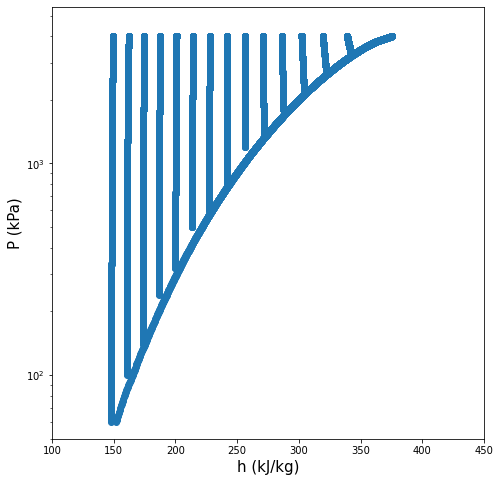

In [10]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([100, 450]);
ax.scatter(x=df_part1['h (kJ/kg)'].values,y=df_part1['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

In [11]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_{}_for_P_part1.csv'.format(step)
  
# saving the excel
df_part1.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_{}_for_P_part1.csv'.format(step)\n  \n# saving the excel\ndf_part1.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [12]:
'''df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.5_for_P_part1.csv')

df_part1'''

"df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.5_for_P_part1.csv')\n\ndf_part1"

#Augmenting the data second with various temperatures for each sub table
The generated dataframe above contains tables what we can call clusters cover the entire range of pressure with a little bit far part temperature values so now we will do interpolation for each cluster to generate more temperature values between the two end, first is the saturation and the second is the maximum temperatures by interpolating new points of T between each two consequent temperature points with a constant arbitrary valued step.

**Finally:**the resulting table is quite same to the above one, here the number of clusters is the same to the above but contains more row than it because of generating new ones.


In [13]:
df_part1.duplicated(subset=['T ©','P (kPa)']).sum()

0

In [14]:
deg=1
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}

#Using Ps for interpolating is because of it is the unique property from cluster to another.
for P in (df_part1['P (kPa)'].unique()):
    
    #The below df is a cluster copy from the big data frame that was been generated.
    df=df_part1[df_part1['P (kPa)']==P]
    

    #Now we iterate over the cluster with temperature T_upper to interpolate with
    #and i to get the next temperature from the next row T_lower
    for i,T_upper in enumerate(df['T ©'].unique()):
        if (T_upper==df['T ©'].min()):
          generated['T ©'].append(T_upper)
          generated['P (kPa)'].append(P)
          generated['v (m^3/kg)'].append(float(df[df['T ©']==T_upper]['v (m^3/kg)'].values))
          generated['u (kJ/kg)'].append(float(df[df['T ©']==T_upper]['u (kJ/kg)'].values))
          generated['h (kJ/kg)'].append(float(df[df['T ©']==T_upper]['h (kJ/kg)'].values))
          generated['s (kJ/kg.K)'].append(float(df[df['T ©']==T_upper]['s (kJ/kg.K)'].values))
          generated['Sound Spd. (m/s)'].append(float(df[df['T ©']==T_upper]['Sound Spd. (m/s)'].values))
          generated['Viscosity (Pa.s)'].append(float(df[df['T ©']==T_upper]['Viscosity (Pa.s)'].values))
          generated['Therm. Cond. (W/m.K)'].append(float(df[df['T ©']==T_upper]['Therm. Cond. (W/m.K)'].values))
          print('Appended the original data!')
          print("End of df")
          break #Break when reaching the end of cluster because there is not T_lower else

        else:
          T_lower=(df.iloc[i+1]['T ©'])


        #Now iterpolation for an intermediate values of T between T_upper and T_lower
        #The step here is approximatly .3 degree celsius 
        T_col= np.linspace(T_upper,T_lower,num=int(np.abs(np.abs(T_lower)-np.abs(T_upper))/deg),endpoint=False)
        P_col=np.full(shape=T_col.shape,fill_value=P)
        if (len(T_col)==0):continue

        upper_row=np.array(df[df['T ©']==T_upper][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)','Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        lower_row=np.array(df[df['T ©']==T_lower][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)', 'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        props=((np.tile(((lower_row-upper_row)/(T_lower-T_upper)), (T_col.shape[0], 1)))*(T_col-T_upper)[:,None])+upper_row        

        generated['T ©'].extend(T_col)
        generated['P (kPa)'].extend(P_col)
        generated['v (m^3/kg)'].extend(props[:,0])
        generated['u (kJ/kg)'].extend(props[:,1])
        generated['h (kJ/kg)'].extend(props[:,2])
        generated['s (kJ/kg.K)'].extend(props[:,3])
        generated['Sound Spd. (m/s)'].extend(props[:,4])
        generated['Viscosity (Pa.s)'].extend(props[:,5])
        generated['Therm. Cond. (W/m.K)'].extend(props[:,6])

        print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],props[:,0][0],props[:,1][0],props[:,2][0],props[:,3][0]))
        #display(pd.DataFrame(columns))
        
generated_df=pd.DataFrame(generated)
generated=0
generated_df

Streaming output truncated to the last 5000 lines.
Appended P 3686.746987951807 ,T 20.0, v 0.0008055198795180723, u 224.85301204819277, h 227.82240963855423, s1.0888518072289157
Appended P 3686.746987951807 ,T 10.0, v 0.0007841519277108434, u 211.305421686747, h 214.19481927710845, s1.0415265060240966
Appended P 3686.746987951807 ,T 0.0, v 0.0007648115662650602, u 198.01036144578313, h 200.8322891566265, s0.9934889156626505
Appended P 3686.746987951807 ,T -10.0, v 0.0007471113253012049, u 184.9478313253012, h 187.7022891566265, s0.9445287951807229
Appended P 3686.746987951807 ,T -20.0, v 0.0007307710843373495, u 172.09277108433736, h 174.78722891566264, s0.8944886746987952
Appended P 3686.746987951807 ,T -30.0, v 0.0007155684337349398, u 159.42277108433737, h 162.05722891566265, s0.8431936144578314
Appended the original data!
End of df
Appended P 3687.751004016064 ,T 96.29418072289155, v 0.0013370987951807228, u 354.2240562248996, h 359.16224899598393, s1.481775502008032
Appended P 368

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.000000,0.000710,151.960000,152.000000,0.812020,792.760000,0.000445,0.109100
1,-37.956667,60.000000,0.000708,150.676667,150.716667,0.806547,797.593333,0.000452,0.109600
2,-38.978333,60.000000,0.000707,149.393333,149.433333,0.801073,802.426667,0.000460,0.110100
3,-40.000000,60.000000,0.000705,148.110000,148.150000,0.795600,807.260000,0.000467,0.110600
4,-36.663872,61.025641,0.000710,152.303846,152.344615,0.813444,791.492051,0.000443,0.108970
...,...,...,...,...,...,...,...,...,...
395421,-36.000000,4000.000000,0.000707,151.816000,154.640000,0.811126,811.522000,0.000460,0.110458
395422,-37.000000,4000.000000,0.000705,150.567000,153.385000,0.805857,816.044000,0.000466,0.110931
395423,-38.000000,4000.000000,0.000704,149.318000,152.130000,0.800588,820.566000,0.000473,0.111404
395424,-39.000000,4000.000000,0.000702,148.069000,150.875000,0.795319,825.088000,0.000480,0.111877


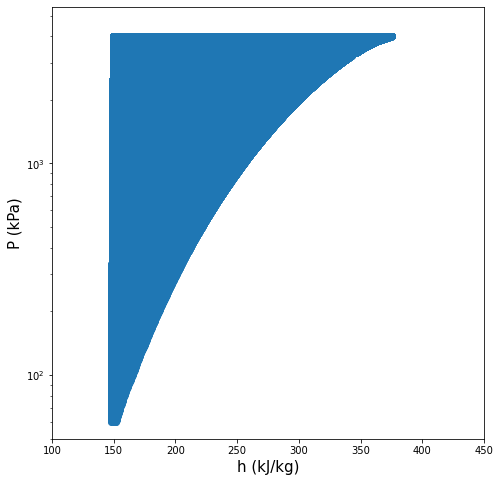

In [15]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([100, 450]);
ax.scatter(x=generated_df['h (kJ/kg)'].values,y=generated_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

In [16]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)
  
# saving the excel
generated_df.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)\n  \n# saving the excel\ngenerated_df.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [17]:
'''generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.5_for_P_0.5_for_T.csv')

generated_df'''

"generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.5_for_P_0.5_for_T.csv')\n\ngenerated_df"

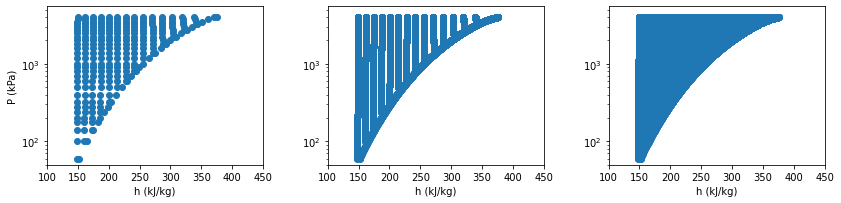

In [18]:
fig=plt.figure();

for i in range(0,3):
  if i == 0: df=o_df
  elif i==1: df=df_part1
  elif i==2: df=generated_df
  ax=fig.add_axes([(i*.65),0,.5,.55]);
  ax.set_yscale('log');
  plt.ylim([50, 5500]);
  plt.xlim([100, 450]);
  ax.scatter(x=df['h (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
  if i ==0 :ax.set_ylabel('P (kPa)',fontsize=10);
  ax.set_xlabel('h (kJ/kg)',fontsize=10);

#Training the models with various Ks

In [19]:
subcooled_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.5_for_P_0.5_for_T.csv')
subcooled_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.000710,151.960000,152.000000,0.812020,792.760000,0.000445,0.109100
1,-37.445833,60.0,0.000709,151.318333,151.358333,0.809283,795.176667,0.000449,0.109350
2,-37.956667,60.0,0.000708,150.676667,150.716667,0.806547,797.593333,0.000452,0.109600
3,-38.467500,60.0,0.000708,150.035000,150.075000,0.803810,800.010000,0.000456,0.109850
4,-38.978333,60.0,0.000707,149.393333,149.433333,0.801073,802.426667,0.000460,0.110100
...,...,...,...,...,...,...,...,...,...
1581880,-38.000000,4000.0,0.000704,149.318000,152.130000,0.800588,820.566000,0.000473,0.111404
1581881,-38.500000,4000.0,0.000703,148.693500,151.502500,0.797953,822.827000,0.000477,0.111641
1581882,-39.000000,4000.0,0.000702,148.069000,150.875000,0.795319,825.088000,0.000480,0.111877
1581883,-39.500000,4000.0,0.000702,147.444500,150.247500,0.792685,827.349000,0.000484,0.112114


In [20]:
subcooled_valid_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_subcooled_augmented_0.2_for_P_0.25_for_T.csv')
subcooled_valid_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.000710,151.960000,152.000000,0.812020,792.760000,0.000445,0.109100
1,-37.190417,60.0,0.000709,151.639167,151.679167,0.810652,793.968333,0.000447,0.109225
2,-37.445833,60.0,0.000709,151.318333,151.358333,0.809283,795.176667,0.000449,0.109350
3,-37.701250,60.0,0.000709,150.997500,151.037500,0.807915,796.385000,0.000451,0.109475
4,-37.956667,60.0,0.000708,150.676667,150.716667,0.806547,797.593333,0.000452,0.109600
...,...,...,...,...,...,...,...,...,...
7911838,-39.000000,4000.0,0.000702,148.069000,150.875000,0.795319,825.088000,0.000480,0.111877
7911839,-39.250000,4000.0,0.000702,147.756750,150.561250,0.794002,826.218500,0.000482,0.111995
7911840,-39.500000,4000.0,0.000702,147.444500,150.247500,0.792685,827.349000,0.000484,0.112114
7911841,-39.750000,4000.0,0.000701,147.132250,149.933750,0.791367,828.479500,0.000485,0.112232


In [21]:
subcooled_X_train= subcooled_X_test= subcooled_df[['T ©', 'P (kPa)']]
subcooled_y_train= subcooled_y_test = subcooled_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']]



In [22]:
a, subcooled_valid_X, c, subcooled_valid_y = train_test_split(subcooled_valid_df[['T ©', 'P (kPa)']],
                                                    subcooled_valid_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']],
                                                    test_size=.005,
                                                    random_state=40,
                                                    shuffle=True)


In [23]:
for K in range(1,6):

  subcooled_model=KNR(n_neighbors=K,weights='distance',p=1)
  subcooled_model.fit(subcooled_X_train, subcooled_y_train)
  print("For K = {}, The error is {} %.".format(K,((np.abs((subcooled_model.predict(subcooled_X_test)-subcooled_y_test)/subcooled_y_test)).max().max())*100))

For K = 1, The error is 0.0 %.
For K = 2, The error is 0.0 %.
For K = 3, The error is 0.0 %.
For K = 4, The error is 0.0 %.
For K = 5, The error is 0.0 %.


In [24]:
for K in range(1,11):

  subcooled_model=KNR(n_neighbors=K,weights='distance',p=1)
  subcooled_model.fit(subcooled_X_train, subcooled_y_train)
  print("For K = {}, The error is {} %.".format(K,((np.abs((subcooled_model.predict(subcooled_valid_X)-subcooled_valid_y)/subcooled_valid_y)).max().max())*100))

For K = 1, The error is 2.8254039305009053 %.
For K = 2, The error is 1.8257026948912753 %.
For K = 3, The error is 0.8361906538568458 %.
For K = 4, The error is 0.7847887197367515 %.
For K = 5, The error is 1.1805763625140555 %.
For K = 6, The error is 1.1801849821941683 %.
For K = 7, The error is 1.3272854183431086 %.
For K = 8, The error is 1.607329951953664 %.
For K = 9, The error is 1.7485498796139296 %.
For K = 10, The error is 1.8977189641544372 %.


#Analyzing the best model

In [25]:
K=4
subcooled_model=KNR(n_neighbors=K,weights='distance',p=1)
subcooled_model.fit(subcooled_X_train, subcooled_y_train)
print("For K = {}, The validation maximum percent error is {} %.".format(K,((np.abs((subcooled_model.predict(subcooled_valid_X)-subcooled_valid_y)/subcooled_valid_y)).max().max())*100))
print("For K = {}, The validation minimum percent error is {} %.".format(K,((np.abs((subcooled_model.predict(subcooled_valid_X)-subcooled_valid_y)/subcooled_valid_y)).min().min())*100))
start=time.time()
subcooled_model.predict(subcooled_valid_X)
print("The elapsed time for predicting {} entry is {} seconds.".format(len(subcooled_valid_X),(time.time()-start)))

For K = 4, The validation maximum percent error is 0.7847887197367515 %.
For K = 4, The validation minimum percent error is 0.0 %.
The elapsed time for predicting 39560 entry is 0.27928733825683594 seconds.


In [26]:
subcooled_error_df= ((subcooled_model.predict(subcooled_valid_X)-subcooled_valid_y)/subcooled_valid_y)*100
subcooled_error_df.describe()

,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,3.956000e+04,3.956000e+04,3.956000e+04,3.956000e+04,3.956000e+04,3.956000e+04,3.956000e+04
mean,-1.697520e-04,-1.082582e-04,-1.093240e-04,-8.008396e-05,6.757100e-04,6.898666e-04,2.364360e-04
std,1.111182e-02,6.818105e-03,6.856388e-03,4.757104e-03,3.215814e-02,2.349184e-02,7.526507e-03
min,-3.000476e-01,-1.143562e-01,-1.143063e-01,-8.883710e-02,-7.847887e-01,-5.176205e-01,-1.177848e-01
25%,-1.513078e-05,-1.317371e-05,-5.030456e-06,-1.036533e-05,-7.082840e-05,-6.885193e-05,-3.364291e-05
50%,1.022202e-07,8.902404e-08,1.169905e-08,-2.784474e-08,-1.453861e-08,5.764854e-07,5.078417e-08
75%,1.702138e-05,1.432882e-05,5.537389e-06,9.968523e-06,6.861675e-05,7.513886e-05,3.488049e-05
max,2.573528e-01,8.462895e-02,8.504775e-02,6.412377e-02,6.916781e-01,4.232856e-01,1.228836e-01


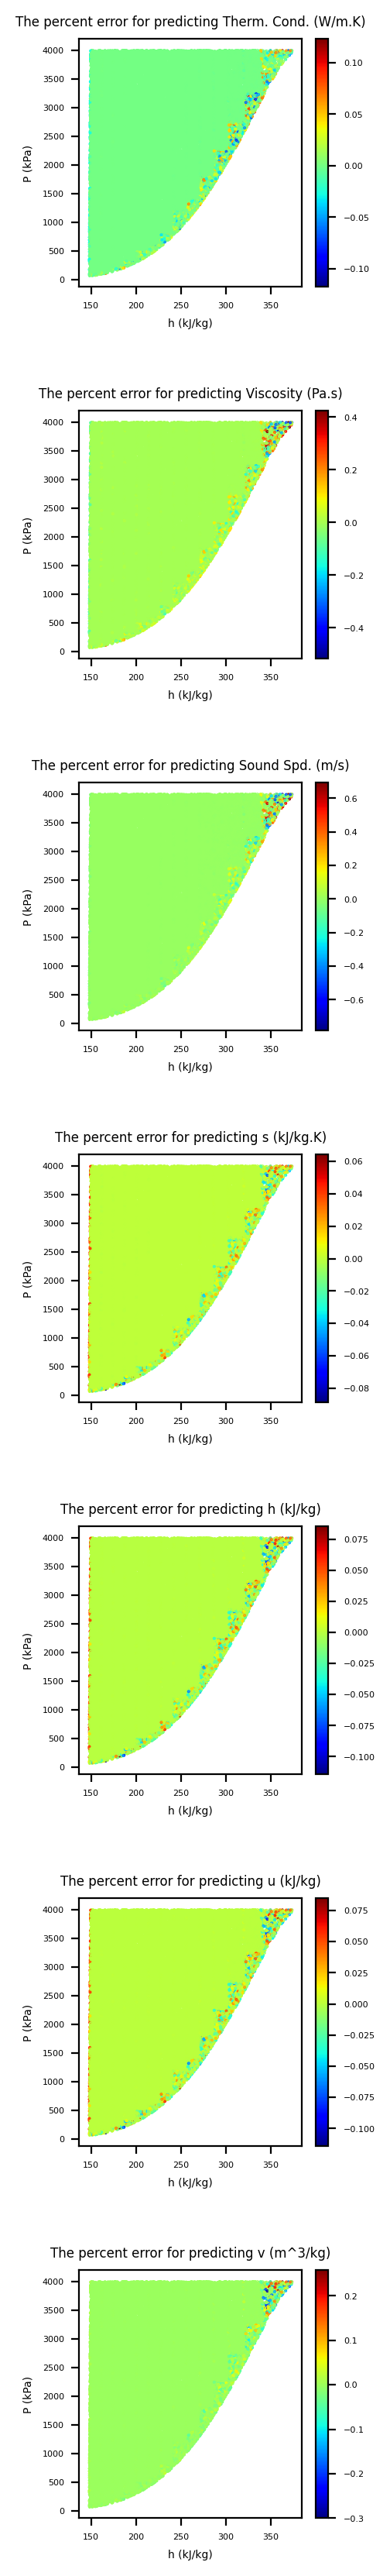

In [27]:
fig=plt.figure(dpi=200);


for i,col in enumerate(subcooled_error_df.columns):

  plt.rc('xtick', labelsize=4);
  plt.rc('ytick', labelsize=4);
  ax=fig.add_axes([0,(i*.6),.3,.4]);
  x=ax.scatter(subcooled_valid_y['h (kJ/kg)'], subcooled_valid_X['P (kPa)'], c=subcooled_error_df[col],cmap="jet", s=.2);
  ax.set_ylabel('P (kPa)',fontsize=5)
  plt.colorbar(x);
  plt.title('The percent error for predicting {}'.format(col),fontsize=6);
  ax.set_xlabel('h (kJ/kg)',fontsize=5);


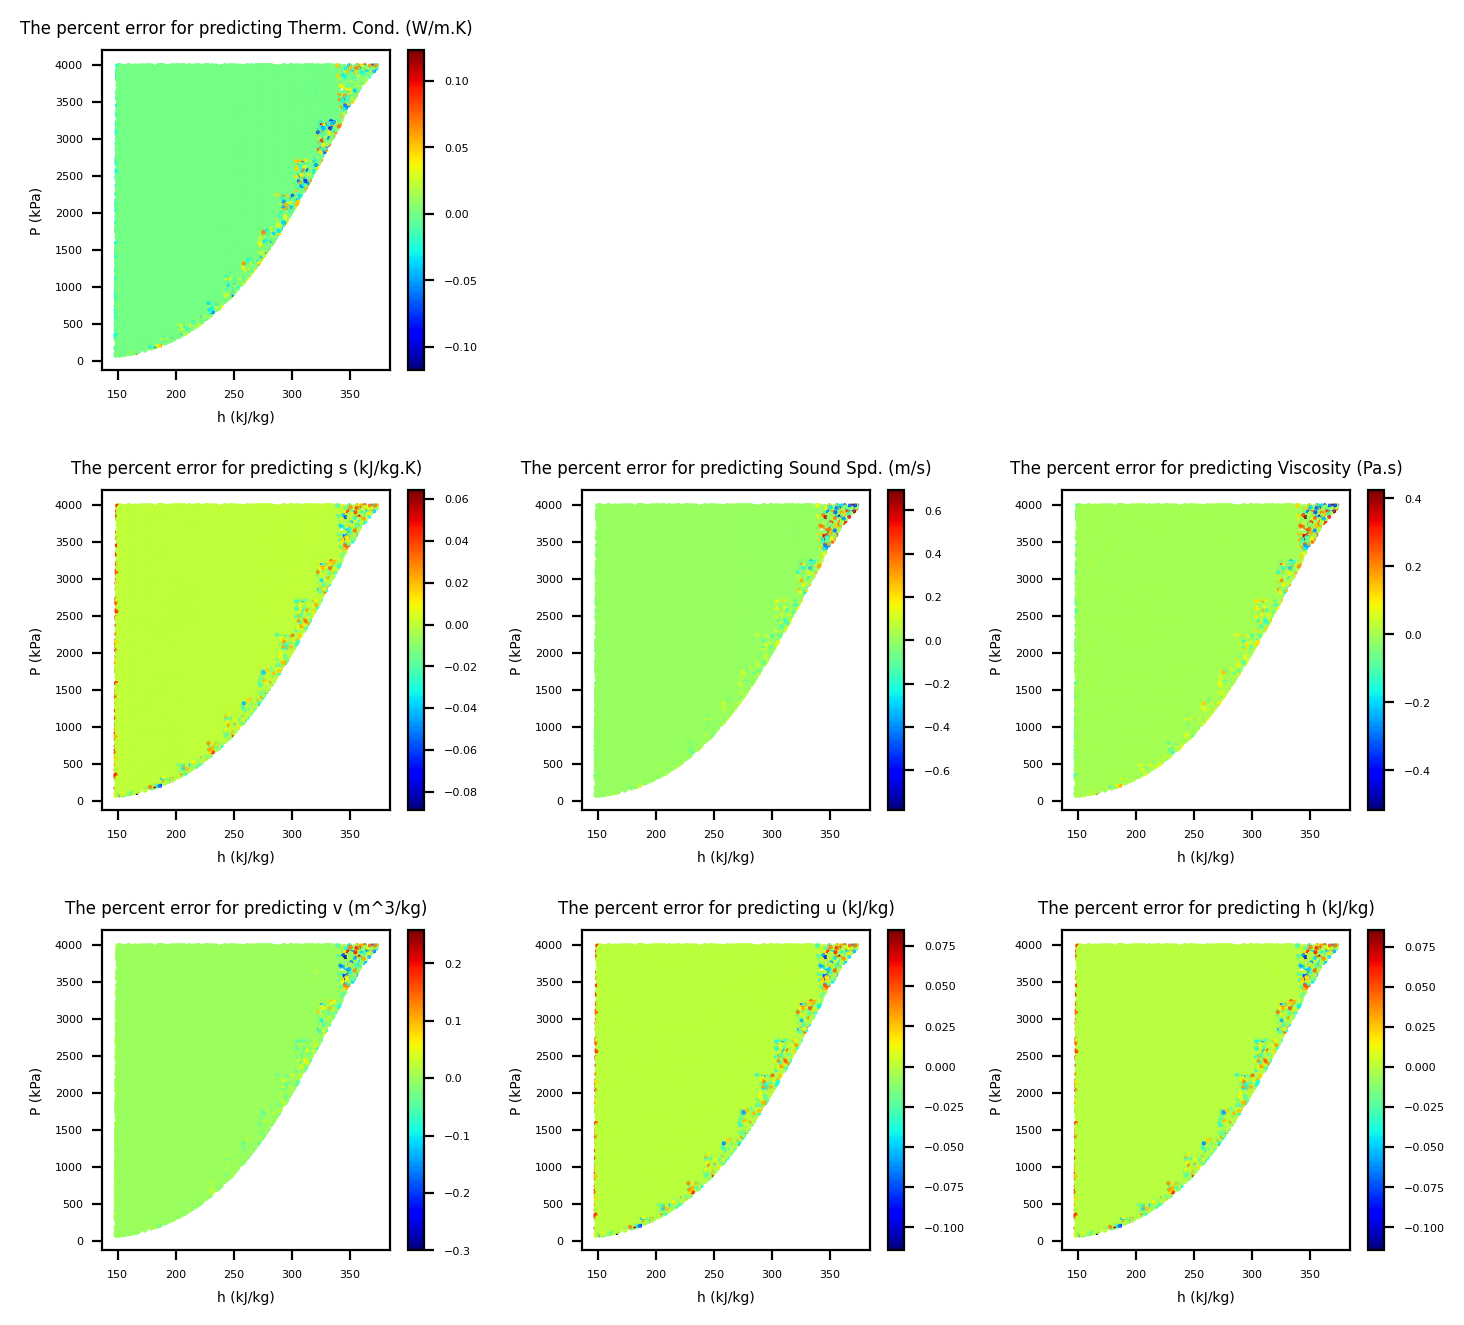

In [28]:
fig=plt.figure(dpi=200);


for i in range(0,4):
  for k in range(0,3):
    if ((k+(i*3))>(len(subcooled_error_df.columns)-1)):break
    col=subcooled_error_df.columns[(k+(i*3))]
    plt.rc('xtick', labelsize=4);
    plt.rc('ytick', labelsize=4);
    ax=fig.add_axes([(k*.4),(i*.55),.3,.4]);
    x=ax.scatter(subcooled_valid_y['h (kJ/kg)'], subcooled_valid_X['P (kPa)'], c=subcooled_error_df[col],cmap="jet", s=.2);
    ax.set_ylabel('P (kPa)',fontsize=5)
    plt.colorbar(x);
    plt.title('The percent error for predicting {}'.format(col),fontsize=6);
    ax.set_xlabel('h (kJ/kg)',fontsize=5);
  if ((i+k+1)>len(subcooled_error_df.columns)):break

In [29]:
for i,col in enumerate(subcooled_valid_y.columns):
  mse(subcooled_model.predict(subcooled_valid_X)[:,i],subcooled_valid_y[col])
  print('The MSE for the columns {} is {}'.format(col,mse(subcooled_model.predict(subcooled_valid_X)[:,i],subcooled_valid_y[col])))

The MSE for the columns v (m^3/kg) is 1.8347747920628994e-14
The MSE for the columns u (kJ/kg) is 0.000360699234962561
The MSE for the columns h (kJ/kg) is 0.000374833286623447
The MSE for the columns s (kJ/kg.K) is 3.3621682011506604e-09
The MSE for the columns Sound Spd. (m/s) is 0.004809913145711903
The MSE for the columns Viscosity (Pa.s) is 1.004665198301741e-15
The MSE for the columns Therm. Cond. (W/m.K) is 2.4879307581264362e-11
